In [1]:
import pandas as pd
import sys
from Bio.SeqUtils.ProtParam import ProteinAnalysis

sys.path.append('/home/bikash/Documents/Solubility/For_upload/Solubility/')

import functions

#Datasets
pET = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])


In [3]:
#SWI
pET['SWI'] = pET['Protein'].apply(lambda x:functions.np.mean(functions.solubility_score(x)))
ecoli_w3110['SWI'] = ecoli_w3110['Sequence'].apply(lambda x:functions.np.mean(functions.solubility_score(x)))


#Flexibility
pET['Analysed_seq'] = pET['Protein'].apply(ProteinAnalysis)
pET['Flexibility_scores'] = pET['Analysed_seq'].apply(lambda x:x.flexibility())
pET['Flexibility'] = pET['Flexibility_scores'].apply(functions.np.mean)


ecoli_w3110['Analysed_seq'] = ecoli_w3110['Sequence'].apply(ProteinAnalysis)
ecoli_w3110['Flexibility_scores'] = ecoli_w3110['Analysed_seq'].apply(lambda x:x.flexibility())
ecoli_w3110['Flexibility'] = ecoli_w3110['Flexibility_scores'].apply(functions.np.mean)

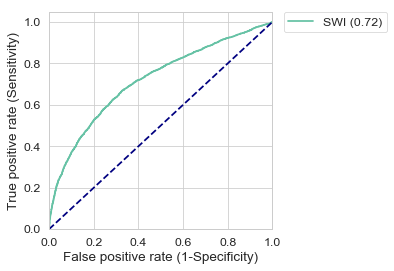

SpearmanrResult(correlation=0.5040987724767835, pvalue=9.458243956892371e-206)

In [5]:
#SWI

#ROC for pET

df = pET[['SWI']].copy()

labels = pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(ecoli_w3110['SWI'], ecoli_w3110['Solubility(%)'])

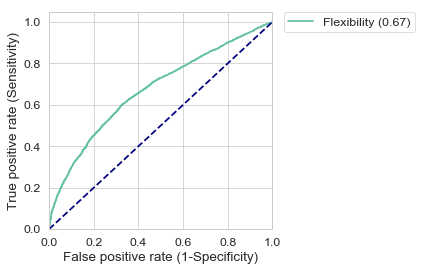

SpearmanrResult(correlation=0.3725351614547515, pvalue=7.72623618919182e-106)

In [6]:
#Flexibility

#ROC for pET

df = pET[['Flexibility']].copy()

labels = pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(ecoli_w3110['Flexibility'], ecoli_w3110['Solubility(%)'])